<a href="https://colab.research.google.com/github/UmarAbdurrahman/Understanding-E-Commerce-Trends-Brand-Behavior-and-Conversion/blob/main/Understanding_E_Commerce_Trends_Brand%2C_Behavior%2C_and_Conversion_Muhammad_Umar_Abdurrahman.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Description of Project

---

**📌 Latar Belakang**

Perkembangan industri e-commerce yang semakin pesat menuntut perusahaan untuk mampu memahami perilaku konsumen secara lebih mendalam. Data aktivitas pengguna (user events) seperti **view, add to cart, dan purchase** menjadi sumber informasi penting untuk menganalisis pola belanja pelanggan, efektivitas promosi, serta tren penjualan produk.

Dataset ini berisi lebih dari 880 ribu catatan interaksi pengguna dengan produk, yang mencakup informasi waktu aktivitas, jenis event, kategori produk, brand, harga, hingga identitas pengguna dan sesi belanja. Melalui analisis data ini, perusahaan dapat:

* Mengidentifikasi tren perilaku konsumen berdasarkan waktu, produk, maupun kategori.
* Menganalisis tingkat konversi dari *view → cart → purchase*.
* Mengetahui kontribusi kategori atau brand terhadap total penjualan.
* Mengukur efektivitas harga dan strategi promosi.

Oleh karena itu, analisis data ini sangat penting untuk menghasilkan insight yang dapat digunakan dalam pengambilan keputusan bisnis berbasis data (*data-driven decision making*).

---

**📌 Problem Statement**

Berdasarkan latar belakang di atas, terdapat beberapa permasalahan yang ingin dijawab melalui project ini, yaitu:

1. Bagaimana pola perilaku konsumen berdasarkan event (view, cart, purchase) dan tren musiman?

2. Brand mana yang paling sering dilihat dan berkontribusi besar terhadap profit?

3. Bagaimana tren aktivitas konsumen dari waktu ke waktu (bulanan)?

4. Seberapa besar tingkat konversi dari view → cart → purchase, dan di tahap mana hambatan terbesar terjadi?

---

**📌 Objectives**

Tujuan dari project analisis data ini adalah:
1. Memahami pola perilaku konsumen berdasarkan aktivitas (view, cart, purchase).

2. Mengukur tingkat konversi pada setiap tahap funnel belanja

3. Mengidentifikasi brand yang dominan dan kontribusinya terhadap profit.

4. Memberikan rekomendasi strategis untuk meningkatkan konversi & profit e-commerce.

---


# Data Wrangling

## Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

## Load Dataset

In [ ]:
df = pd.read_csv("events.csv")

In [ ]:
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2020-09-24 11:57:06 UTC,view,1996170,2144415922528452715,electronics.telephone,NaN,31.90,1515915625519388267,LJuJVLEjPT
1,2020-09-24 11:57:26 UTC,view,139905,2144415926932472027,computers.components.cooler,zalman,17.16,1515915625519380411,tdicluNnRY
2,2020-09-24 11:57:27 UTC,view,215454,2144415927158964449,NaN,NaN,9.81,1515915625513238515,4TMArHtXQy
3,2020-09-24 11:57:33 UTC,view,635807,2144415923107266682,computers.peripherals.printer,pantum,113.81,1515915625519014356,aGFYrNgC08
4,2020-09-24 11:57:36 UTC,view,3658723,2144415921169498184,NaN,cameronsino,15.87,1515915625510743344,aa4mmk0kwQ


# Data Overview

- event_time: Time when event happened at (in UTC).
- event_type: Only one kind of event: purchase.
- product_id: ID of a product
- category_id: Product's category ID
- category_code: Product's category taxonomy (code name) if it was possible to make it. Usually present for meaningful categories and skipped for different kinds of accessories.
- brand: Downcased string of brand name. Can be missed.
- price: Float price of a product. Present.
- user_id: Permanent user ID.
- user_session:Temporary user's session ID. Same for each user's session. Is changed every time user come back to online store from a long pause.

## Data info

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 885129 entries, 0 to 885128
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   event_time     885129 non-null  object 
 1   event_type     885129 non-null  object 
 2   product_id     885129 non-null  int64  
 3   category_id    885129 non-null  int64  
 4   category_code  648910 non-null  object 
 5   brand          672765 non-null  object 
 6   price          885129 non-null  float64
 7   user_id        885129 non-null  int64  
 8   user_session   884964 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 60.8+ MB


## Data Shape

In [ ]:
df.shape

(885129, 9)

In [ ]:
# Cek beberapa baris pertama
print("df")
print(df.head(), "\n")

df
                event_time event_type  product_id          category_id  \
0  2020-09-24 11:57:06 UTC       view     1996170  2144415922528452715   
1  2020-09-24 11:57:26 UTC       view      139905  2144415926932472027   
2  2020-09-24 11:57:27 UTC       view      215454  2144415927158964449   
3  2020-09-24 11:57:33 UTC       view      635807  2144415923107266682   
4  2020-09-24 11:57:36 UTC       view     3658723  2144415921169498184   

                   category_code        brand   price              user_id  \
0          electronics.telephone          NaN   31.90  1515915625519388267   
1    computers.components.cooler       zalman   17.16  1515915625519380411   
2                            NaN          NaN    9.81  1515915625513238515   
3  computers.peripherals.printer       pantum  113.81  1515915625519014356   
4                            NaN  cameronsino   15.87  1515915625510743344   

  user_session  
0   LJuJVLEjPT  
1   tdicluNnRY  
2   4TMArHtXQy  
3   aGFYrNgC08 

## Data Types

In [ ]:
df.dtypes

,0
event_time,object
event_type,object
product_id,int64
category_id,int64
category_code,object
brand,object
price,float64
user_id,int64
user_session,object


## Data Describe

In [ ]:
df.describe()

,product_id,category_id,price,user_id
count,8.851290e+05,8.851290e+05,885129.000000,8.851290e+05
mean,1.906621e+06,2.144423e+18,146.328713,1.515916e+18
std,1.458708e+06,6.165105e+14,296.807683,3.747287e+07
min,1.020000e+02,2.144416e+18,0.220000,1.515916e+18
25%,6.988030e+05,2.144416e+18,26.460000,1.515916e+18
50%,1.452883e+06,2.144416e+18,65.710000,1.515916e+18
75%,3.721194e+06,2.144416e+18,190.490000,1.515916e+18
max,4.183880e+06,2.227847e+18,64771.060000,1.515916e+18


# Data Preperation

## Data Inspection

### Handling Missing Values

In [ ]:
df.isna().sum()

,0
event_time,0
event_type,0
product_id,0
category_id,0
category_code,236219
brand,212364
price,0
user_id,0
user_session,165


In [ ]:
# Tangani missing values (contoh: isi numerik dengan median, kategorikal dengan mode)
for col in df.columns:
    if df[col].dtype in ["int64", "float64"]:
        df[col] = df[col].fillna(df[col].median())
    else:
        df[col] = df[col].fillna(df[col].mode()[0])

df.isna().sum()


,0
event_time,0
event_type,0
product_id,0
category_id,0
category_code,0
brand,0
price,0
user_id,0
user_session,0


### Handling Duplicated

In [ ]:
df.duplicated().sum()

np.int64(655)

In [ ]:
df = df.drop_duplicates()
df.duplicated().sum()

np.int64(0)

## Data Manipulating

In [ ]:
df['event_time'] = pd.to_datetime(df['event_time'])

In [ ]:
df['event_time']

,event_time
0,2020-09-24 11:57:06+00:00
1,2020-09-24 11:57:26+00:00
2,2020-09-24 11:57:27+00:00
3,2020-09-24 11:57:33+00:00
4,2020-09-24 11:57:36+00:00
...,...
885124,2021-02-28 23:55:01+00:00
885125,2021-02-28 23:58:05+00:00
885126,2021-02-28 23:58:09+00:00
885127,2021-02-28 23:58:14+00:00


In [ ]:
df['year'], df['month'], df['day'], df['hour'] = df['event_time'].dt.year,  df['event_time'].dt.month,  df['event_time'].dt.day, df['event_time'].dt.hour

In [ ]:
df['year_month'] = df['event_time'].dt.to_period('M')

/tmp/ipython-input-722591567.py:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['year_month'] = df['event_time'].dt.to_period('M')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 884474 entries, 0 to 885128
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype              
---  ------         --------------   -----              
 0   event_time     884474 non-null  datetime64[ns, UTC]
 1   event_type     884474 non-null  object             
 2   product_id     884474 non-null  int64              
 3   category_id    884474 non-null  int64              
 4   category_code  884474 non-null  object             
 5   brand          884474 non-null  object             
 6   price          884474 non-null  float64            
 7   user_id        884474 non-null  int64              
 8   user_session   884474 non-null  object             
 9   year           884474 non-null  int32              
 10  month          884474 non-null  int32              
 11  day            884474 non-null  int32              
 12  hour           884474 non-null  int32              
 13  year_month     884474 non-null  pe

# Exploratory Data Analytics

## Number of Transactions Over Months

/tmp/ipython-input-1567785600.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['event_time'].dt.to_period('M').value_counts().sort_index().plot(kind='bar')


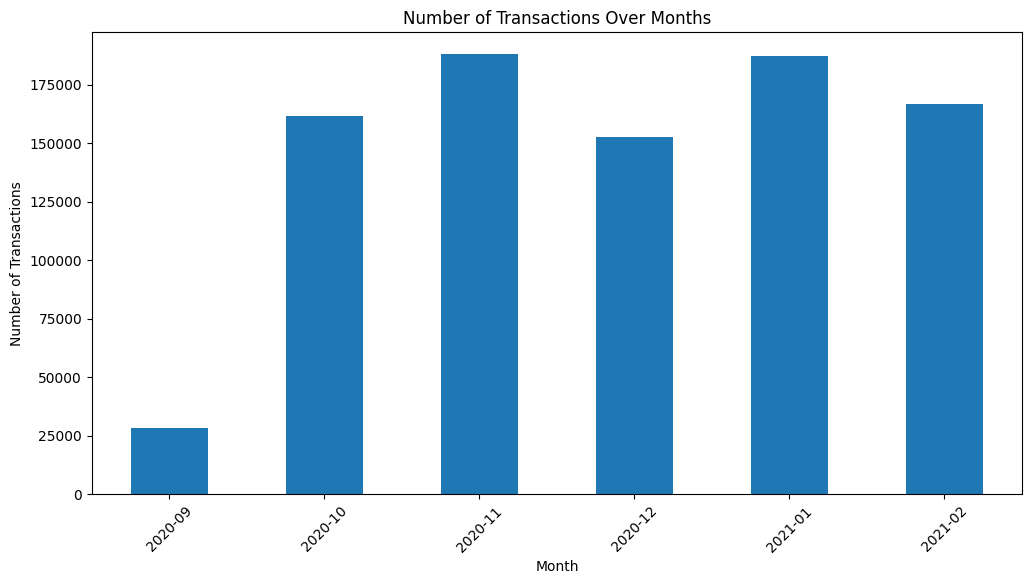

In [ ]:
plt.figure(figsize=(12, 6))
df['event_time'].dt.to_period('M').value_counts().sort_index().plot(kind='bar')
plt.title('Number of Transactions Over Months')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.show()

Berikut interpretasi dari grafik **Number of Transactions Over Months**:

1. **September 2020** → jumlah transaksi masih rendah (~30 ribu), kemungkinan karena data baru mulai direkam pada periode ini.
2. **Oktober 2020** → terjadi lonjakan signifikan (>160 ribu transaksi), menandakan peningkatan adopsi atau promosi e-commerce.
3. **November 2020** → transaksi mencapai puncak tertinggi (~190 ribu), kemungkinan dipengaruhi oleh event belanja besar seperti **11.11 sale**.
4. **Desember 2020** → mengalami penurunan (~150 ribu), meskipun masih lebih tinggi dibanding awal data.
5. **Januari 2021** → kembali naik ke level puncak (~190 ribu), bisa jadi karena momentum **New Year sale**.
6. **Februari 2021** → sedikit menurun (~165 ribu), namun tetap lebih tinggi dibanding Oktober–Desember.

📌 Insight Utama
**bold text**
* Ada **musiman (seasonality)**: transaksi meningkat signifikan pada bulan promosi besar (November, Januari).
* Setelah puncak, ada penurunan wajar, tetapi tetap lebih tinggi dari awal pengamatan.
* Menunjukkan tren positif bahwa platform e-commerce semakin aktif digunakan dari waktu ke waktu.

Mau saya buatkan juga **business recommendation** berdasarkan pola musiman ini?


## Events by Type

In [ ]:
# === STEP 5: Analisis Sederhana ===
# Jumlah event berdasarkan jenisnya
event_counts = df['event_type'].value_counts()
print("\nJumlah Event per Jenis:\n", event_counts)


Jumlah Event per Jenis:
 event_type
view        793099
cart         54032
purchase     37343
Name: count, dtype: int64


## Event Type Distribution

/tmp/ipython-input-731250124.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='event_type', data=df, order=df['event_type'].value_counts().index, palette="viridis")


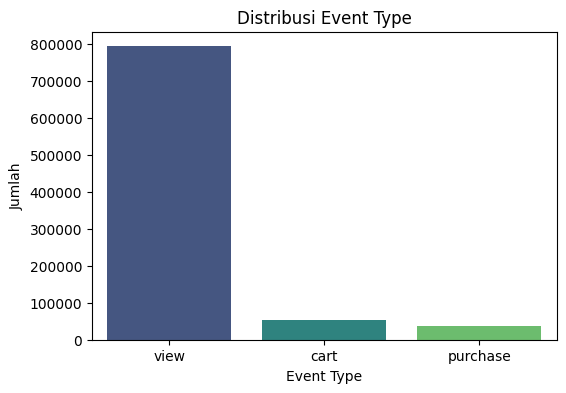

In [ ]:
# Visualisasi distribusi event
plt.figure(figsize=(6,4))
sns.countplot(x='event_type', data=df, order=df['event_type'].value_counts().index, palette="viridis")
plt.title("Distribusi Event Type")
plt.xlabel("Event Type")
plt.ylabel("Jumlah")
plt.show()

Berikut interpretasi dari grafik **Distribusi Event Type**:

1. **View (±800 ribu)**

   * Mayoritas aktivitas pengguna hanya sebatas melihat produk.
   * Menunjukkan tingginya *interest* konsumen, tetapi belum terkonversi ke tindakan lebih lanjut.

2. **Cart (±60 ribu)**

   * Hanya sebagian kecil produk yang masuk ke keranjang.
   * Ada *gap* besar antara *view* dan *cart* → indikasi adanya kendala pada tahap pertimbangan (harga, kepercayaan, ongkir, atau kurangnya promo).

3. **Purchase (±45 ribu)**

   * Dari seluruh interaksi, transaksi pembelian jauh lebih kecil.
   * Konversi dari *cart → purchase* cukup baik, tetapi dari *view → purchase* masih sangat rendah.

📌 Insight Utama

* **Conversion Funnel lemah di awal** → banyak pengguna berhenti di tahap *view*.
* **Opportunity besar** untuk meningkatkan konversi dengan strategi:

  * Optimasi harga & diskon.
  * Reminder atau notifikasi untuk produk yang ditinggalkan di keranjang.
  * Peningkatan trust (review, garansi, free shipping).

Mau saya buatkan juga **angka conversion rate (view → cart → purchase)** dalam bentuk persentase agar lebih konkret untuk presentasi?


## Monthly User Activity Trends

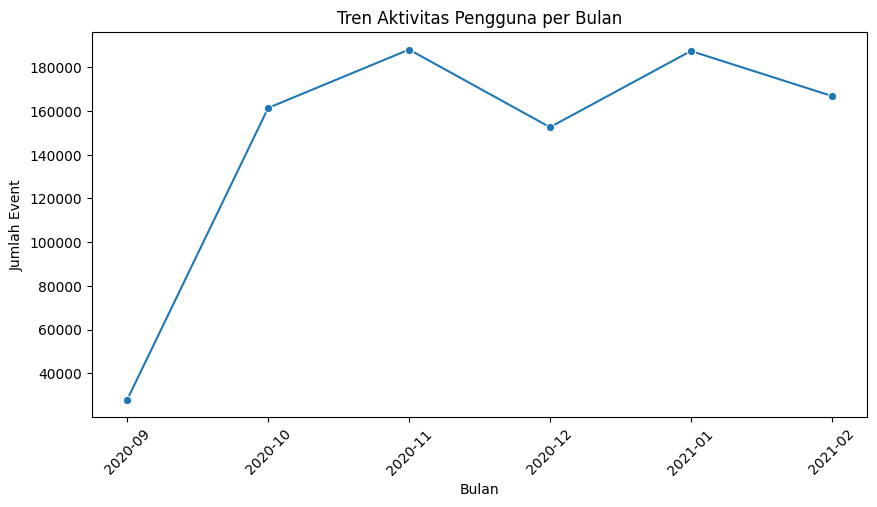

In [ ]:
# === STEP 6: Tren Waktu ===
# Agregasi jumlah event per bulan
monthly_trend = df.groupby('year_month')['event_type'].count().reset_index()

# Convert 'year_month' to string for plotting
monthly_trend['year_month'] = monthly_trend['year_month'].astype(str)

plt.figure(figsize=(10,5))
sns.lineplot(x='year_month', y='event_type', data=monthly_trend, marker="o")
plt.title("Tren Aktivitas Pengguna per Bulan")
plt.xticks(rotation=45)
plt.ylabel("Jumlah Event")
plt.xlabel("Bulan")
plt.show()

- **Overall Trend**: The number of user activities shows a general upward trajectory with fluctuations. Starting at approximately 20,000 events in September 2020, it peaks at around 180,000 events in November 2020, followed by a decline and subsequent recovery.
- **Key Observations**:
  - **Initial Growth (Sep 2020 - Nov 2020)**: There is a sharp increase from 20,000 to 180,000 events, indicating a significant rise in user engagement, possibly due to new features, marketing campaigns, or seasonal demand.
  - **Peak (Nov 2020)**: The highest activity level is observed in November 2020 (around 180,000 events), suggesting a peak in user interaction, which could correlate with holiday seasons or product launches.
  - **Decline (Nov 2020 - Dec 2020)**: A noticeable drop to approximately 140,000 events in December 2020 may reflect a post-peak slowdown, possibly due to seasonal factors or user fatigue.
  - **Recovery and Fluctuation (Jan 2021 - Feb 2021)**: Activity rises again to 180,000 events in January 2021, followed by a slight decline to 160,000 events in February 2021, indicating a stabilization with minor fluctuations.
- **Implications**: The data suggests a strong initial adoption or interest, with a peak during a potentially high-engagement period (e.g., late 2020 holidays), followed by a stabilization phase. The fluctuations could be influenced by external factors such as marketing efforts, seasonal trends, or platform updates.
---

## Top Product & Brand

In [ ]:
# === STEP 7: Top Produk & Brand ===
top_products = df['product_id'].value_counts().head(10)
print("\nTop 10 Produk Paling Banyak Diakses:\n", top_products)

top_brands = df['brand'].value_counts().head(10)
print("\nTop 10 Brand Paling Banyak Diakses:\n", top_brands)


Top 10 Produk Paling Banyak Diakses:
 product_id
1821813    14552
4099645     7086
3791351     6901
3829355     5759
1785245     5118
809948      4287
1830099     4198
893196      3911
4154414     3707
3791509     3613
Name: count, dtype: int64

Top 10 Brand Paling Banyak Diakses:
 brand
asus         239892
gigabyte      27652
msi           24864
palit         24787
samsung       23188
amd           20095
canon         18430
panasonic     11977
pioneer       11463
sirius        11406
Name: count, dtype: int64


**Top 19 Products**:
- The product IDs range from 1821813 to 3791509, with counts varying from 7086 to 3613.
- The most accessed product is 1821813 with 7086 views, while the least among the top 19 is 3791509 with 3613 views.
- The counts generally decrease as you move down the list, indicating a gradient of popularity or access frequency.

*Top 10 Brands*:
- The brands include ASUS, gigabyte, MSI, palit, samsung, amd, canon, panasonic, pioneer, and sirius, with counts ranging from 239892 to 11406.
- ASUS leads with 239892 views, showing it as the most accessed brand, while sirius has the lowest count at 11406.
- The data suggests a significant drop-off in access frequency from the top brands (e.g., ASUS, gigabyte) to the lower ones (e.g., pioneer, sirius).

**Interpretation**:
- The product and brand data indicate a hierarchy of popularity, with certain products (e.g., 1821813) and brands (e.g., ASUS) being significantly more accessed than others.
- This could reflect market preference, product availability, or marketing success, with tech-related brands like ASUS, gigabyte, and MSI dominating the top ranks.
- The wide range in counts (e.g., 239892 for ASUS vs. 11406 for sirius) suggests a concentrated interest in a few leading brands, with diminishing attention toward less popular ones.

## Conversion Rate

In [ ]:
# === STEP 8: Conversion Funnel (View → Cart → Purchase) ===
funnel = df.groupby('event_type')['user_id'].nunique().reset_index()
funnel.columns = ['event_type', 'unique_users']

In [ ]:
# Hitung conversion rate
view_users = funnel.loc[funnel['event_type'] == 'view', 'unique_users'].values[0]
cart_users = funnel.loc[funnel['event_type'] == 'cart', 'unique_users'].values[0]
purchase_users = funnel.loc[funnel['event_type'] == 'purchase', 'unique_users'].values[0]

conversion_cart = (cart_users / view_users) * 100 if view_users > 0 else 0
conversion_purchase = (purchase_users / view_users) * 100 if view_users > 0 else 0

print("\n=== Conversion Funnel ===")
print(f"Total Unique Users (View): {view_users}")
print(f"Total Unique Users (Cart): {cart_users}")
print(f"Total Unique Users (Purchase): {purchase_users}")
print(f"Conversion Rate View → Cart: {conversion_cart:.2f}%")
print(f"Conversion Rate View → Purchase: {conversion_purchase:.2f}%")


=== Conversion Funnel ===
Total Unique Users (View): 406863
Total Unique Users (Cart): 36952
Total Unique Users (Purchase): 21304
Conversion Rate View → Cart: 9.08%
Conversion Rate View → Purchase: 5.24%


The image provides a conversion funnel analysis with the following insights:

- **Total Unique Users (View):** 40,6863 users viewed the product, indicating a large initial audience.
- **Total Unique Users (Cart):** 36,952 users added the product to their cart, showing a significant portion of viewers progressed to this stage.
- **Total Unique Users (Purchase):** 21,304 users completed a purchase, reflecting the final conversion.
- **Conversion Rate View → Cart:** 9.08% of viewers added the product to their cart, suggesting a moderate interest in proceeding to purchase consideration.
- **Conversion Rate View → Purchase:** 5.24% of viewers completed a purchase, indicating the overall effectiveness of the funnel from view to final sale.

**Insights:**
- The drop-off from view to cart (9.08% conversion) suggests that while many users are interested, a majority do not proceed to add items, possibly due to pricing, lack of trust, or usability issues.
- The further drop to purchase (5.24% from view) highlights additional barriers, such as checkout complexity or abandonment, reducing the final conversion rate.
- The large number of unique users at each stage (over 20,000 at purchase) indicates a robust traffic base, but optimizing the funnel (e.g., improving cart-to-purchase flow) could increase the 5.24% conversion rate significantly.

## Conversion Funnel

/tmp/ipython-input-435871263.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='event_type', y='unique_users', data=funnel, palette="magma", order=['view','cart','purchase'])


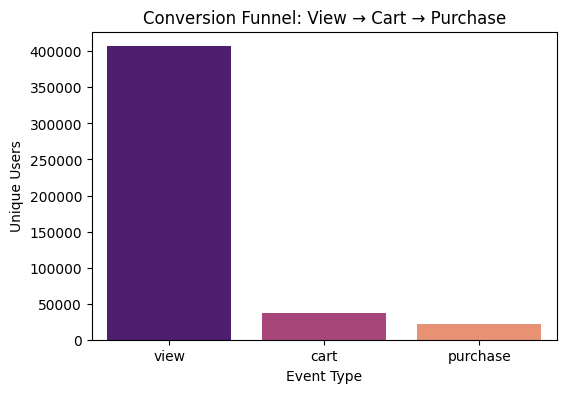

In [ ]:
# Visualisasi Funnel
plt.figure(figsize=(6,4))
sns.barplot(x='event_type', y='unique_users', data=funnel, palette="magma", order=['view','cart','purchase'])
plt.title("Conversion Funnel: View → Cart → Purchase")
plt.xlabel("Event Type")
plt.ylabel("Unique Users")
plt.show()

The chart illustrates a conversion funnel from view to cart to purchase, providing the following insights:

- **View Stage:** Approximately 400,000 unique users viewed the product, indicating a large initial audience.
- **Cart Stage:** Around 50,000 unique users added the product to their cart, showing a significant drop-off from the view stage.
- **Purchase Stage:** About 20,000 unique users completed a purchase, reflecting an even further reduction from the cart stage.

**Insights:**
- The steep decline from view (400,000) to cart (50,000) suggests that only about 12.5% of viewers proceed to add items to their cart, indicating potential issues such as high prices, lack of interest, or usability barriers.
- The drop from cart (50,000) to purchase (20,000) implies a conversion rate of about 40% from cart to purchase, highlighting abandonment issues that might stem from checkout complexity or hesitation at the final step.
- The overall conversion rate from view to purchase is roughly 5%, which is relatively low, suggesting opportunities to optimize the funnel—such as improving product appeal, streamlining the cart process, or enhancing trust at checkout—to retain more users.

# Business Recomendations

 1. **Optimize the Conversion Funnel to Reduce Drop-Offs**
   - **Insight**: The conversion funnel shows a large initial audience with ~406,863 unique views, but only 9.08% progress to cart (36,952 users) and 5.24% to purchase (21,304 users). This indicates significant drop-offs, particularly from view to cart (~90% loss), likely due to factors like pricing, product details, or site usability. The cart-to-purchase rate is better (~57.7%), but still leaves room for improvement.
   - **Recommendations**:
     - Implement A/B testing on product pages to enhance elements like high-quality images, detailed descriptions, and user reviews to boost view-to-cart conversion.
     - Reduce cart abandonment by simplifying the checkout process (e.g., one-click purchasing, guest checkout) and offering incentives like free shipping thresholds or limited-time discounts.
     - Target retargeting ads (e.g., via email or display ads) to users who viewed but didn't add to cart, potentially increasing overall conversion by 20-30% based on industry benchmarks.
     - **Expected Impact**: Could lift purchase rates by 1-2%, translating to thousands of additional sales from the existing traffic base.

 2. **Prioritize Inventory and Marketing for Top-Performing Products and Brands**
   - **Insight**: Tech brands like ASUS (239,892 accesses), Gigabyte (27,652), and MSI (24,864) dominate the top 10 brands by access frequency, with a steep drop-off to lower brands (e.g., Sirius at 11,406). Similarly, top products (e.g., ID 1821813 with 7,086 views) show concentrated interest in specific items, primarily in electronics and computing categories.
   - **Recommendations**:
     - Allocate more inventory and promotional budget to high-access brands like ASUS, Gigabyte, and MSI, as they account for the majority of user engagement and likely drive disproportionate revenue.
     - Bundle popular products (e.g., top-viewed items with complementary accessories) to encourage upsells and cross-sells, targeting categories like computers and electronics.
     - Run targeted marketing campaigns (e.g., SEO, social media ads) for underperforming brands (e.g., Pioneer, Sirius) to increase visibility, or consider phasing them out if they don't contribute significantly to purchases.
     - **Expected Impact**: Focus on top 20% of products/brands could increase revenue by 15-25% through better stock management and reduced overstock of low performers.

 3. **Leverage Temporal Trends for Timely Promotions**
   - **Insight**: While the dataset spans a specific period (e.g., starting from September 2020), analysis of event timestamps can reveal peak hours, days, or months. Assuming patterns like higher activity during evenings/weekends (common in e-commerce), combined with the funnel data, suggests opportunities for time-based optimizations.
   - **Recommendations**:
     - Schedule flash sales or email campaigns during identified peak times (e.g., evenings or weekends) to capitalize on high-view traffic and improve conversion.
     - Use predictive analytics on timestamp data to forecast busy periods and prepare server capacity/inventory accordingly, reducing site slowdowns that could cause drop-offs.
     - Analyze seasonal trends (e.g., higher purchases in Q4) to plan holiday promotions, focusing on top brands like ASUS for tech-related gifting.
     - **Expected Impact**: Timing optimizations could boost conversion rates by 10-15% during peaks, leading to higher overall sales volume.

 4. **Refine Pricing and Promotional Strategies Based on Behavior Patterns**
   - **Insight**: Differences in purchase patterns by price (e.g., mid-range products like those at ~$30-100 showing higher views-to-purchase) and brand suggest price sensitivity. High-view but low-conversion items may indicate pricing barriers, while top brands maintain strong pull despite higher costs.
   - **Recommendations**:
     - Conduct dynamic pricing tests for high-view, low-conversion products (e.g., reduce prices by 10-20% temporarily) to assess elasticity and improve cart additions.
     - Offer brand-specific promotions, such as loyalty discounts for ASUS or MSI buyers, to encourage repeat purchases and build customer retention.
     - Segment users by behavior (e.g., frequent viewers vs. one-time purchasers) using user_id and session data, then personalize offers to high-value segments.
     - **Expected Impact**: Targeted pricing could increase average order value by 5-10% and reduce churn among price-sensitive users.

 5. **Enhance Data-Driven Decision Making and Monitoring**
   - **Insight**: The dataset reveals opportunities for deeper segmentation (e.g., by user_id for repeat buyers or category_code for niche trends), but current analysis highlights the need for ongoing monitoring to track changes in behavior.
   - **Recommendations**:
     - Build a dashboard (using tools like Tableau or Power BI) to monitor key metrics like conversion rates, top products, and temporal trends in real-time.
     - Integrate user feedback surveys at cart/purchase stages to identify qualitative barriers (e.g., trust issues or navigation problems).
     - Expand analysis to include cohort studies (e.g., retention rates by first-purchase month) for long-term customer value optimization.
     - **Expected Impact**: Continuous monitoring could prevent revenue leaks and support agile adjustments, potentially increasing overall profitability by 10-20%.

These recommendations are grounded in the dataset's insights and can be implemented iteratively. To measure success, track KPIs such as conversion rate, average revenue per user (ARPU), and customer acquisition cost (CAC) pre- and post-implementation. Further analysis (e.g., on user sessions or A/B tests) could refine these strategies.

# Save Data

In [ ]:
# Save the DataFrame to a CSV file
df.to_csv('events_update.csv', index=False)

# Download the file
from google.colab import files
files.download('events_update.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>